### Dog vs Cat Image Classification - (Without Image Augmentation)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import style

style.use("ggplot")

In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Data Loading

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file(fname='cats_and_dogs_filtered.zip', 
                                  origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
!ls $zip_dir_base
print(zip_dir)
print(zip_dir_base)

cats_and_dogs_filtered	cats_and_dogs_filtered.zip
/root/.keras/datasets/cats_and_dogs_filtered.zip
/root/.keras/datasets


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
print("{}\n".format(base_dir))

train_dir = os.path.join(base_dir, 'train')
print("{}".format(train_dir))

validation_dir = os.path.join(base_dir, 'validation')
print("{}\n".format(validation_dir))

train_cats_dir = os.path.join(train_dir, 'cats')
print("{}".format(train_cats_dir))
train_dogs_dir = os.path.join(train_dir, 'dogs')
print("{}\n".format(train_dogs_dir))

validation_cats_dir = os.path.join(validation_dir, 'cats')
print("{}".format(validation_cats_dir))
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("{}\n".format(validation_dogs_dir))

/root/.keras/datasets/cats_and_dogs_filtered

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs

/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs



In [0]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_validation = num_cats_validation + num_dogs_validation

In [0]:
print(total_train)
print(total_validation)

2000
1000


### Data Preparation
1. Read images from the disk
2. Decode contents of these images and convert it into proper grid format as per their RGB content
3. Convert them into floating point tensors
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, 
                                                           target_size=(IMG_SHAPE, IMG_SHAPE), 
                                                           class_mode='binary', 
                                                           batch_size=BATCH_SIZE, 
                                                           shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
validation_data_gen = validation_image_generator.flow_from_directory(directory=validation_dir, 
                                                                     target_size=(IMG_SHAPE, IMG_SHAPE), 
                                                                     class_mode='binary', 
                                                                     batch_size=BATCH_SIZE, 
                                                                     shuffle=True)

Found 1000 images belonging to 2 classes.


### Visualizing Training Images

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
sample_training_images.shape

(100, 150, 150, 3)

In [0]:
def plot_images(images_arr):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.grid(False)
  plt.tight_layout()
  plt.show()

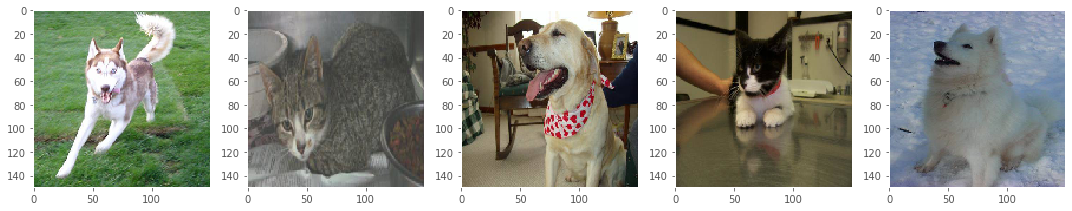

In [0]:
plot_images(images_arr=sample_training_images[:5])

## Model Creation

### Define the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu, 
                         input_shape=(150, 150, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

### Model Summary

In [0]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Fit the Model

In [0]:
EPOCHS = 50
history = model_1.fit_generator(generator=train_data_gen, 
                                steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))), 
                                epochs=EPOCHS, 
                                validation_data=validation_data_gen, 
                                validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))))

Epoch 1/50
20/20 [==============================] - 12s 607ms/step - loss: 0.7296 - accuracy: 0.5145 - val_loss: 0.6899 - val_accuracy: 0.5080
Epoch 2/50
20/20 [==============================] - 8s 377ms/step - loss: 0.6888 - accuracy: 0.5335 - val_loss: 0.6933 - val_accuracy: 0.5090
Epoch 3/50
20/20 [==============================] - 7s 363ms/step - loss: 0.6787 - accuracy: 0.5560 - val_loss: 0.6679 - val_accuracy: 0.5290
Epoch 4/50
20/20 [==============================] - 7s 366ms/step - loss: 0.6569 - accuracy: 0.6120 - val_loss: 0.6458 - val_accuracy: 0.6270
Epoch 5/50
20/20 [==============================] - 7s 369ms/step - loss: 0.6459 - accuracy: 0.6210 - val_loss: 0.6280 - val_accuracy: 0.6400
Epoch 6/50
20/20 [==============================] - 7s 370ms/step - loss: 0.6048 - accuracy: 0.6710 - val_loss: 0.6363 - val_accuracy: 0.6640
Epoch 7/50
20/20 [==============================] - 8s 383ms/step - loss: 0.5593 - accuracy: 0.7240 - val_loss: 0.5873 - val_accuracy: 0.6970
Epoch

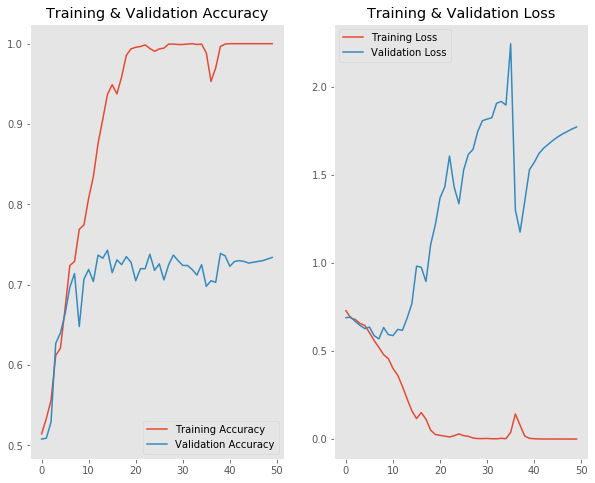

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid(False)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(False)
plt.savefig("./foo.png")
plt.show()